<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_6_Clustering_(EastWestAirlines_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
df=pd.read_excel("/content/EastWestAirlines.xlsx","data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


#Hierarchical_Clustering

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Normalized data frame
df_norm = norm_func(df.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


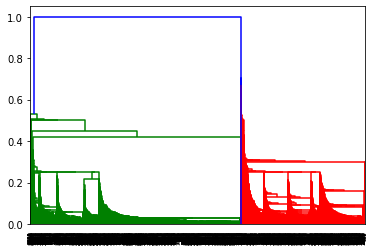

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [ ]:
y_hc

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,1


In [ ]:
df['h_clusterid'] = Clusters
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
df.h_clusterid.value_counts()

0    2518
1    1478
3       1
4       1
2       1
Name: h_clusterid, dtype: int64

In [ ]:
#As per dendrogram the total cluster formed is 3. Cluster 0 and 1 consits majority of the data point.Also as the data points are more Hirerchical Clustering is not feasible.

#K-means Clustering

In [ ]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.61281465e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.61281465e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.61281465e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.28603836e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.61281465e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.61281465e-01]])

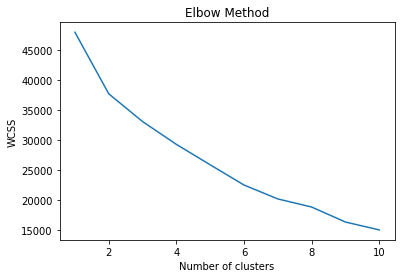

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0) #you can use any number in random_state
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
Kmean_clusters_id = KMeans(8, random_state=0)
Kmean_clusters_id.fit(scaled_df)

KMeans(random_state=0)

In [ ]:
Kmean_clusters_id.labels_

array([7, 7, 7, ..., 0, 2, 2], dtype=int32)

In [ ]:
#Assign clusters to the data set
df['Kmean_clusters_id'] = Kmean_clusters_id.labels_

In [ ]:
#these are standardized values.
Kmean_clusters_id.cluster_centers_

array([[-0.14011913,  0.06570128, -0.26965795, -0.09824189, -0.06276658,
        -0.27400351, -0.11131278, -0.02826216, -0.02211153,  0.05750057,
         1.30391816,  1.28603836],
       [ 0.46021739, -0.08550248,  1.02231833, -0.09824189, -0.05451775,
         0.546656  ,  0.65270433, -0.18269929, -0.20464848,  0.16704094,
        -0.7669193 , -0.76128147],
       [-0.4164604 , -0.0623949 , -0.69045689, -0.09824189, -0.06276658,
        -0.58321022, -0.60810431, -0.20075624, -0.23253496, -1.0364872 ,
        -0.7669193 , -0.76128147],
       [ 1.36396339,  0.98044997,  0.13230591, -0.09824189, -0.06276658,
         0.73785547,  1.81788428,  4.06989083,  4.35742738,  0.34927384,
         0.97603556,  0.97894039],
       [ 0.54553763,  0.03071576,  1.57854679, -0.09824189, -0.05322743,
         1.53722702,  0.93506928,  0.02332353,  0.05370525,  0.49078524,
         1.30391816,  1.29366339],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  

In [ ]:
df.groupby('Kmean_clusters_id').agg(['mean']).reset_index()

,Kmean_clusters_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1959.949878,59482.495110,194.938875,1.688264,1.000000,1.000000,10528.223716,10.533007,420.487775,1.289731,4237.290954,1.000000,1.000000
1,1,1828.067633,119974.241546,77.972625,3.466989,1.000000,1.001610,30345.466989,17.869565,204.270531,0.597424,4463.478261,0.000000,0.000000
2,2,3202.929342,31637.501472,95.847890,1.108930,1.000000,1.000000,3061.516192,5.762512,178.990186,0.491658,1978.341511,0.000000,0.000000
3,3,1640.058333,211038.458333,902.558333,2.241667,1.000000,1.000000,34962.541667,29.058333,6158.041667,17.900000,4839.766667,0.841667,0.850000
4,4,1456.134078,128571.370577,167.875233,4.232775,1.000000,1.001862,54265.724395,20.581006,492.709497,1.577281,5131.970205,1.000000,1.003724
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.733333
6,6,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.395349
7,7,1154.602906,47859.993947,84.898305,1.124697,1.000000,1.001211,3158.780872,6.170702,182.031477,0.547215,5617.134383,0.000000,0.000000


In [ ]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,Kmean_clusters_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,7
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,7
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,7
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,7
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,4


In [ ]:
df.Kmean_clusters_id.value_counts()

2    1019
7     826
0     818
1     621
4     537
3     120
6      43
5      15
Name: Kmean_clusters_id, dtype: int64

In [ ]:
#As per elbow method it seems that 8 is the optimum number of cluster. Cluster 2 consist the biggest no. of passengers with 1019 records.

#DB scan clustering

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=12)
dbscan.fit(scaled_df)

DBSCAN(eps=2, min_samples=12)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
DBscan_Cluster_ID=pd.DataFrame(dbscan.labels_,columns=['DBscan_Cluster_ID'])

In [ ]:
DBscan_Cluster_ID.tail()

,DBscan_Cluster_ID
3994,1
3995,1
3996,1
3997,0
3998,0


In [ ]:
df=pd.concat([df,DBscan_Cluster_ID],axis=1)

In [ ]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,Kmean_clusters_id,DBscan_Cluster_ID
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,2,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0,0,2,0


In [ ]:
df.DBscan_Cluster_ID.value_counts()

 0    2440
 1    1302
-1     241
 2      16
Name: DBscan_Cluster_ID, dtype: int64

In [ ]:
#Inferences - DB scan cluster shows 3 clusters (0,1 and 2) and outliers(-1).